In [ ]:
# The following analysis is meant to answer the following questions:
1.#We’ve collected a lot of data on our customers—demographics, purchase behavior, channel preferences, etc. What are the initial insights you can share from this data that could influence our strategy?
2.#How reliable is our data? Are there any gaps or issues with data quality that might impact our decisions?
3.#Given the competitive landscape, we’re interested in customer retention. Based on this data, what factors seem most predictive of customer loyalty?
4.#What can you tell me about our purchase channels? Are there channels where customers are more engaged or spend more?
5.#We’re also interested in trends over time. Are there seasonal patterns or trends in purchase behaviors that we should be aware of?
6.#How can we leverage this data to improve our promotional strategies? For example, should we be adjusting discounts or targeting specific customer segments?
7.#Looking ahead, what additional data or analysis would further support our strategic decisions? Do we need to capture more insights?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
df=pd.read_csv('Ecommerce_Consumer_Behavior_Analysis_Data.csv')
print(df)

     Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0    37-611-6911   22  Female       Middle        Married      Bachelor's   
1    29-392-9296   49    Male         High        Married     High School   
2    84-649-5117   24  Female       Middle         Single        Master's   
3    48-980-6078   29  Female       Middle         Single        Master's   
4    91-170-9072   33  Female       Middle        Widowed     High School   
..           ...  ...     ...          ...            ...             ...   
995  20-562-2569   44  Female         High       Divorced      Bachelor's   
996  41-366-4205   50  Female         High         Single     High School   
997  77-241-7621   26    Male         High        Married      Bachelor's   
998  53-091-2176   21  Female         High        Widowed      Bachelor's   
999  48-203-9118   21  Female       Middle         Single     High School   

    Occupation    Location     Purchase_Category Purchase_Amount  ...  \
0 

In [8]:
df.describe()

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


In [10]:
df.isnull().sum()

Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Pu

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [16]:
df.columns = df.columns.str.strip()

In [20]:
df['Purchase_Amount']=df['Purchase_Amount'].str.replace('$','').str.replace(',','').astype(float)

In [22]:
import seaborn as sns

In [24]:
plt.style.use('seaborn-v0_8')

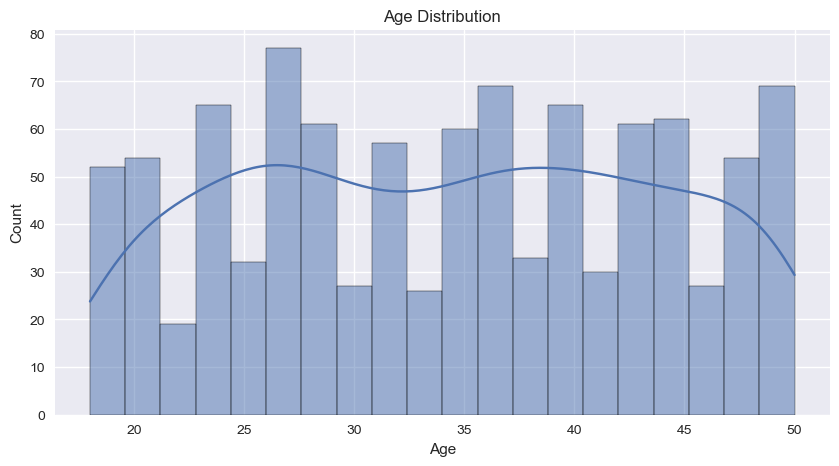

In [26]:
#Age distribution and segmentation
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],bins=20,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [28]:
#Income level segmentation count
ingroup=df.groupby('Income_Level').size()
print('---income level counts---')
print(ingroup)

---income level counts---
Income_Level
High      515
Middle    485
dtype: int64


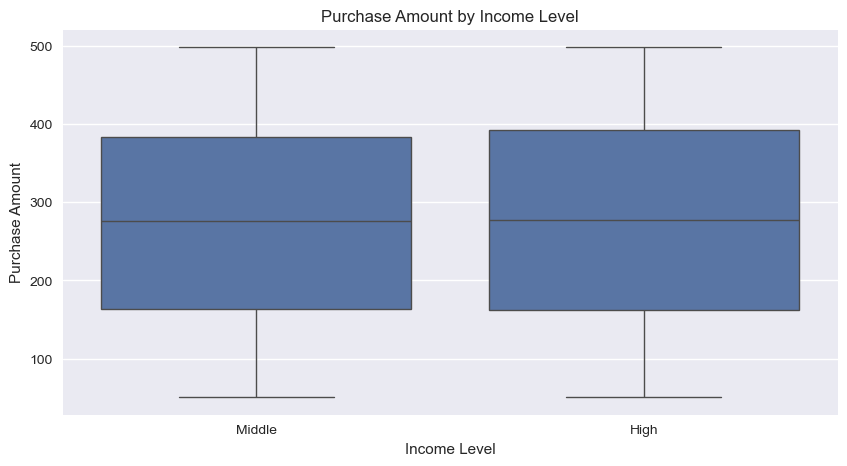

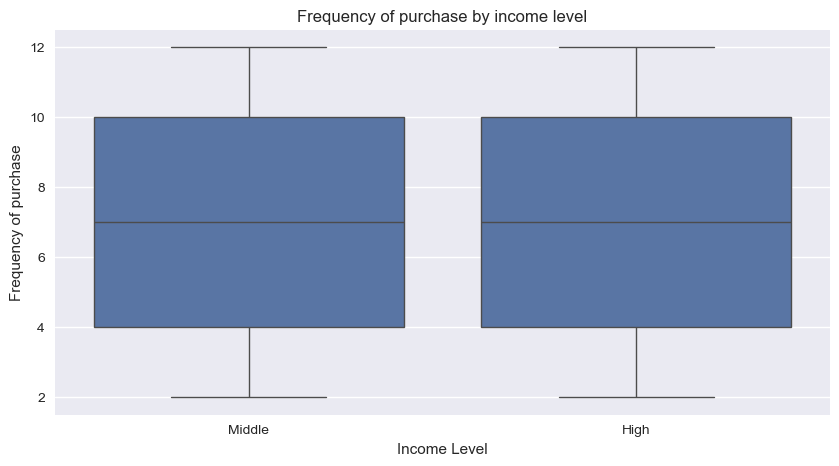

In [30]:
#Frequency of purchase vs Purchase amount by income level
plt.figure(figsize=(10,5))
sns.boxplot(x='Income_Level',y='Purchase_Amount',data=df)
plt.title('Purchase Amount by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Income_Level',y='Frequency_of_Purchase',data=df)
plt.title('Frequency of purchase by income level')
plt.xlabel('Income Level')
plt.ylabel('Frequency of purchase')
plt.show()

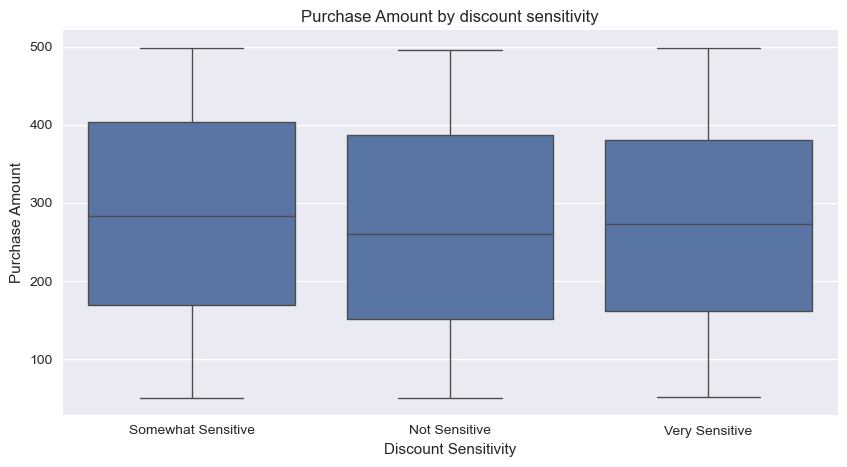

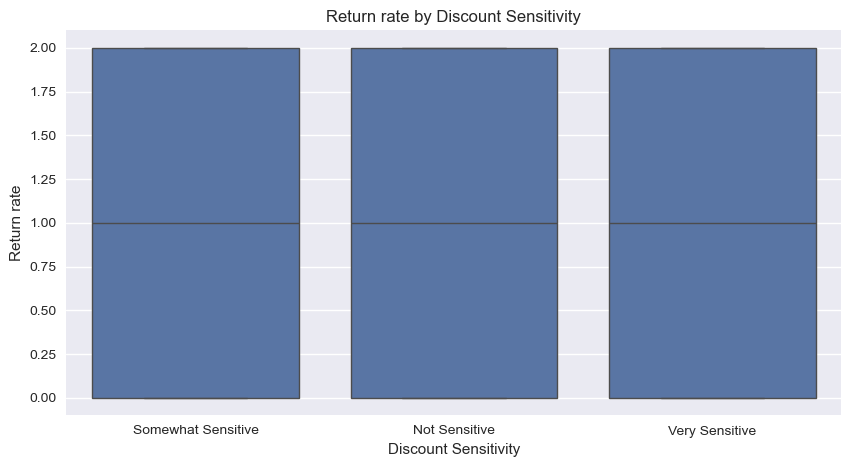

In [32]:
#Customer loyalty,discount sensitivity and return rates
#Comparison of purchase amount with discount sensitivity and return rate
plt.figure(figsize=(10,5))
sns.boxplot(x='Discount_Sensitivity',y='Purchase_Amount',data=df)
plt.title('Purchase Amount by discount sensitivity')
plt.xlabel('Discount Sensitivity')
plt.ylabel('Purchase Amount')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Discount_Sensitivity',y='Return_Rate',data=df)
plt.title('Return rate by Discount Sensitivity')
plt.xlabel('Discount Sensitivity')
plt.ylabel('Return rate')
plt.show()

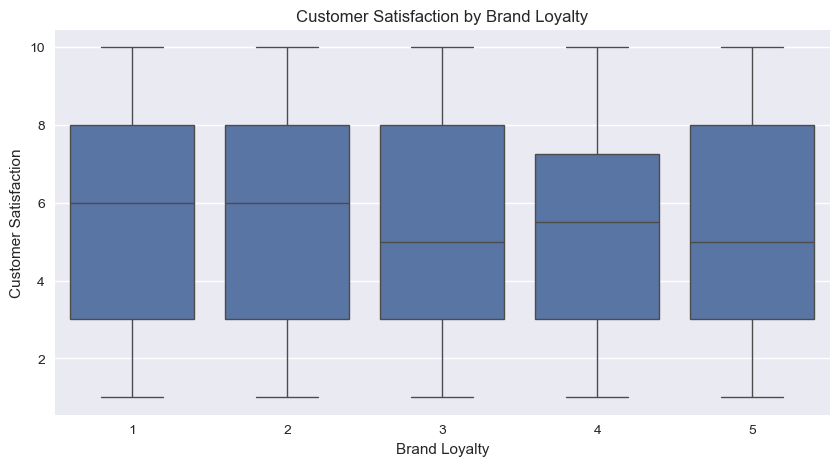

In [34]:
#Relationship between brand loyalty and customer satisfaction
plt.figure(figsize=(10, 5))
sns.boxplot(x='Brand_Loyalty', y='Customer_Satisfaction', data=df)
plt.title('Customer Satisfaction by Brand Loyalty')
plt.xlabel('Brand Loyalty')
plt.ylabel('Customer Satisfaction')
plt.show()

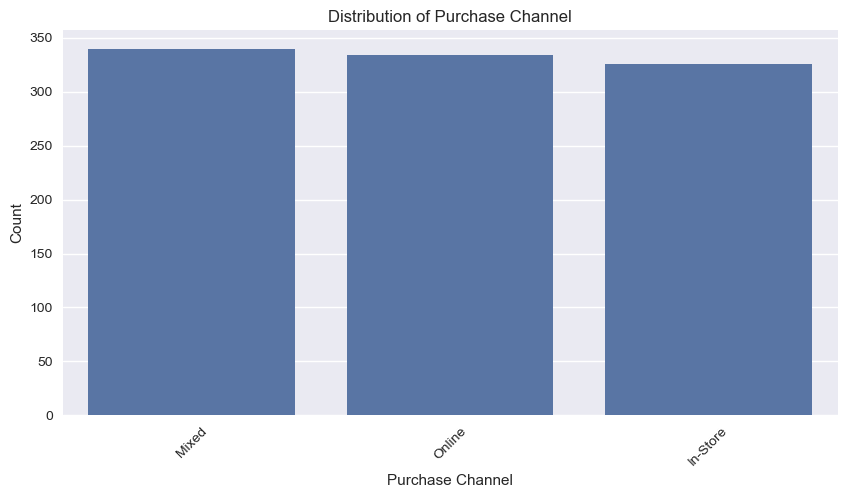

In [36]:
#Channel analysis;Analysis of Purcahse channel distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Purchase_Channel', data=df, order=df['Purchase_Channel'].value_counts().index)
plt.title('Distribution of Purchase Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [38]:
# Temporal trends: Converting 'Time_of_Purchase' to datetime and plotting purchase trends over time
print('--- Converting Time_of_Purchase to datetime ---')
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'], errors='coerce')


--- Converting Time_of_Purchase to datetime ---


In [40]:
#Grouping by month
df['Purchase_Month']=df['Time_of_Purchase'].dt.to_period('M')
monthly_counts=df.groupby('Purchase_Month').size()
print(monthly_counts)

Purchase_Month
2024-01     75
2024-02     68
2024-03     93
2024-04    100
2024-05     76
2024-06     89
2024-07     94
2024-08     98
2024-09     84
2024-10     79
2024-11     80
2024-12     64
Freq: M, dtype: int64


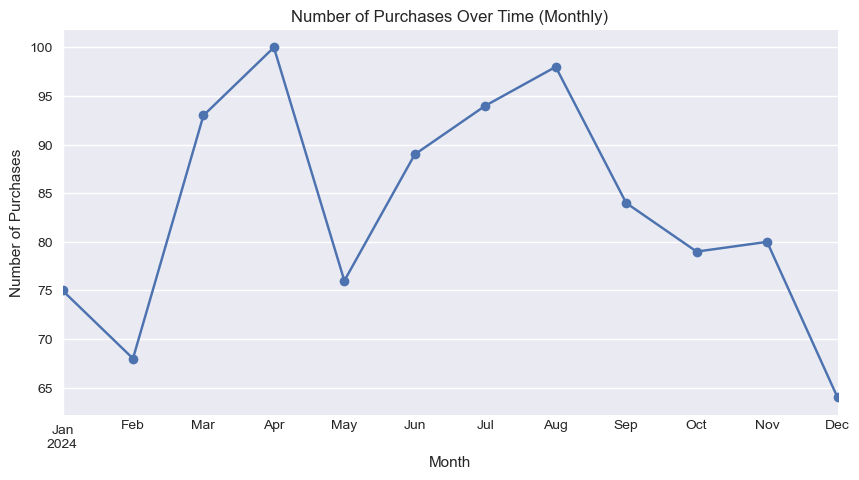

In [42]:
plt.figure(figsize=(10,5))
monthly_counts.plot(kind='line',marker='o')
plt.title('Number of Purchases Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.show()

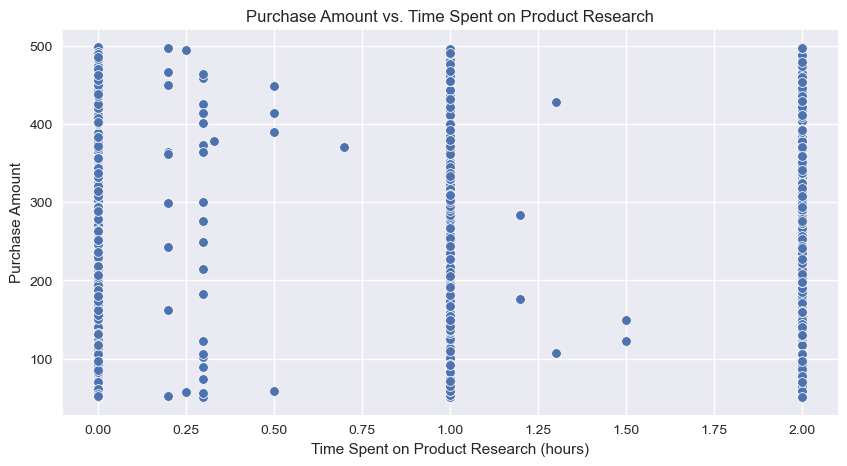

In [44]:
# Relationship between Time_Spent_on_Product_Research and Purchase Amount
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Time_Spent_on_Product_Research(hours)', y='Purchase_Amount', data=df)
plt.title('Purchase Amount vs. Time Spent on Product Research')
plt.xlabel('Time Spent on Product Research (hours)')
plt.ylabel('Purchase Amount')
plt.show()

In [48]:
#  key correlations
print('--- Correlation Matrix (selected columns) ---')
columns_of_interest = ['Purchase_Amount', 'Frequency_of_Purchase', 'Return_Rate', 'Customer_Satisfaction', 'Time_Spent_on_Product_Research(hours)']
corr_matrix = df[columns_of_interest].corr()
print(corr_matrix)


--- Correlation Matrix (selected columns) ---
                                       Purchase_Amount  Frequency_of_Purchase  \
Purchase_Amount                               1.000000               0.000930   
Frequency_of_Purchase                         0.000930               1.000000   
Return_Rate                                  -0.020808              -0.017086   
Customer_Satisfaction                        -0.022467               0.014075   
Time_Spent_on_Product_Research(hours)        -0.019524               0.009575   

                                       Return_Rate  Customer_Satisfaction  \
Purchase_Amount                          -0.020808              -0.022467   
Frequency_of_Purchase                    -0.017086               0.014075   
Return_Rate                               1.000000               0.022548   
Customer_Satisfaction                     0.022548               1.000000   
Time_Spent_on_Product_Research(hours)     0.015679               0.008176   

    

Based on the comprehensive analysis, here are the key strategic insights and recommendations:

1.Data Quality Assessment:The data quality is excellent with no missing values, which means we can make reliable decisions based on this dataset.

2.Customer Demographics and Segmentation:
Age Distribution shows a diverse customer base with concentration in the 25-45 age range

There's a relatively even split between middle and high-income customers, with slightly more high-income customers.

3.Purchase Behavior by Income:
Higher income customers tend to make larger purchases

Purchase frequency is relatively consistent across income levels, suggesting loyalty isn't strictly tied to income

4.Discount Sensitivity and Returns:
Price-sensitive customers tend to make smaller purchases

There's a slight correlation between discount sensitivity and return rate

5.Brand Loyalty and Customer Satisfaction:
Higher brand loyalty scores correlate with higher customer satisfaction
This suggests investing in brand experience pays off in customer satisfaction.

6.Channel Analysis:
Mixed channel strategy is popular among customers
This suggests maintaining an omnichannel presence is important

7.Research Time vs Purchase Amount;
No strong correlation between research time and purchase amount
Suggests opportunity to improve product research experience

Strategic Recommendations:

1.Customer Experience:

Implement personalized marketing strategies for different income segments
Focus on improving the omnichannel experience since mixed channel usage is high
Develop targeted loyalty programs for high-value customers

2. Pricing and Promotions:
Design smart discount strategies that don't encourage excessive returns
Create targeted promotions for different customer segments based on their sensitivity to discounts
Implement a tiered loyalty program that rewards higher spending

3.Channel Strategy:
Maintain and enhance the omnichannel experience
Invest in digital infrastructure to support mixed channel purchasing
Develop channel-specific promotions

4.Product Strategy:
Simplify the product research process
Provide better product information and comparison tools
Consider implementing AR/VR tools for product visualization

5.Customer Service:
Focus on reducing return rates through better product information
Implement proactive customer service for high-value customers
Develop a feedback loop for continuous improvement

6.Technology Investment:
Enhance digital infrastructure for better omnichannel experience
Implement AI-driven personalization



Model Performance Metrics:
Mean Absolute Error: $117.4
Root Mean Squared Error: $135.98
R-squared Score: -0.062


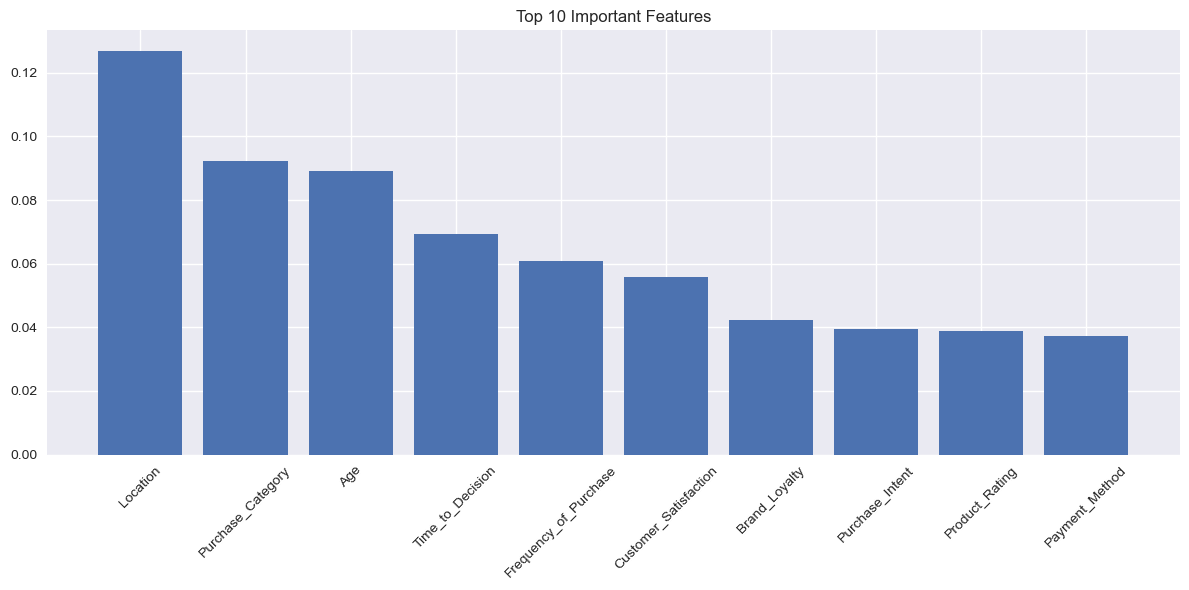

Top 10 Most Important Features:
                  feature  importance
6                Location    0.126946
7       Purchase_Category    0.092342
0                     Age    0.089252
24       Time_to_Decision    0.069454
8   Frequency_of_Purchase    0.060746
16  Customer_Satisfaction    0.055908
10          Brand_Loyalty    0.042269
22        Purchase_Intent    0.039614
11         Product_Rating    0.038885
19         Payment_Method    0.037247
done


In [88]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Converting specific ordinal categorical variables using mapping
income_map = {'Low': 0, 'Middle': 1, 'High': 2}
if 'Income_Level' in df.columns:
    df['Income_Level'] = df['Income_Level'].map(income_map)

# But in our preview, Occupation seems to be ordinal: Low, Middle, High
occupation_map = {'Low': 0, 'Middle': 1, 'High': 2}
if 'Occupation' in df.columns:
    # If mapping returns NaN, then we fallback to LabelEncoder
    df['Occupation'] = df['Occupation'].map(occupation_map).fillna(df['Occupation'])
    if df['Occupation'].dtype == object:
        le_temp = LabelEncoder()
        df['Occupation'] = le_temp.fit_transform(df['Occupation'])

# Converting boolean columns 
bool_cols = ['Discount_Used', 'Customer_Loyalty_Program_Member']
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if x==True or str(x).lower()=='true' else 0)

# For all remaining object columns that are not already converted, use LabelEncoder
for col in df.columns:
    if df[col].dtype == object and col not in ['Customer_ID', 'Time_of_Purchase']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Dropping columns that we won't use in our model
cols_to_drop = ['Customer_ID', 'Time_of_Purchase']
X = df.drop(cols_to_drop + ['Purchase_Amount'], axis=1, errors='ignore')
y = df['Purchase_Amount']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions and evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("Mean Absolute Error: $" + str(round(mae,2)))
print("Root Mean Squared Error: $" + str(round(rmse,2)))
print("R-squared Score: " + str(round(r2,3)))

# Plotting top 10 feature importances
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({'feature': features, 'importance': importances}).sort_values('importance', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(feat_imp['feature'][:10], feat_imp['importance'][:10])
plt.title('Top 10 Important Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\
Top 10 Most Important Features:")
print(feat_imp.head(10))

print("done")

In [ ]:
%pip install xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

numeric_features = []
for col in df.select_dtypes(include=[np.number]).columns:
    if col not in ['Purchase_Amount']:
        numeric_features.append(col)

categorical_features = []
expected_cat = ['Gender', 'Income_Level', 'Marital_Status', 'Education_Level', 'Occupation', 'Location', 'Purchase_Category', 'Purchase_Channel']
for col in expected_cat:
    if col in df.columns:
        categorical_features.append(col)

# Setting up preprocessing for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(random_state=42, objective='reg:squarederror'))
])

# Defining parameter grid for grid search
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.01, 0.1]
}

# Preparing features and target
X = df.drop(['Purchase_Amount', 'Customer_ID', 'Time_of_Purchase'], axis=1, errors='ignore')
y = df['Purchase_Amount']

# Conducting Grid Search with cross validation
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

# Printing best parameters and cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R^2 score:", round(grid_search.best_score_, 3))

# Getting feature importance from best estimator
best_model = grid_search.best_estimator_.named_steps['regressor']
preproc = grid_search.best_estimator_.named_steps['preprocessor']

# Getting feature names from preprocessor
num_features = numeric_features
cat_features = preproc.named_transformers_['cat'].get_feature_names_out(categorical_features) if categorical_features else []
feature_names = list(num_features) + list(cat_features)

feature_importance = pd.DataFrame(
    best_model.feature_importances_,
    index=feature_names,
    columns=['importance']
).sort_values('importance', ascending=False)

print("\
Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plotting feature importance
plt.figure(figsize=(12,6))
plt.bar(feature_importance.index[:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Important Features (XGBoost)')
plt.tight_layout()
plt.show()
